# Gradient Boosting

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [26]:
font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)

In [3]:
df_raw = pd.read_csv("/home/pirl/Downloads/HMEQ.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(),inplace=True)

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["BAD"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)

(2623, 18)
(2623,)


In [8]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.963
Accuracy on test set:0.941


In [9]:
train_accuracy = []; test_accuracy =[]
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


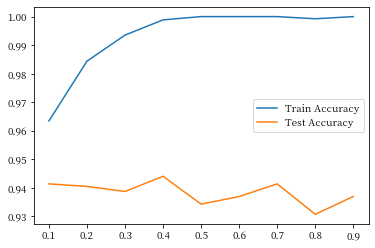

In [10]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [11]:
train_accuracy = []; test_accuracy =[]
para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


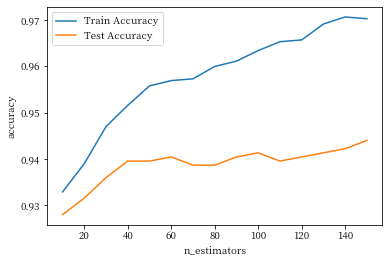

In [12]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()
#100으로 결정

In [13]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.941
5,6,0.998,0.949
6,7,1.000,0.946
7,8,1.000,0.948
8,9,1.000,0.949
9,10,1.000,0.946


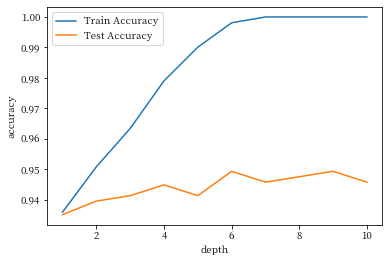

In [14]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("depth")
plt.legend()
#max_depth 4선택

In [15]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(min_samples_split=v_min_samples_split, max_depth =4,
                                    n_estimators = 100, learning_rate = 0.1, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.976,0.942
1,30,0.974,0.942
2,40,0.973,0.937
3,50,0.969,0.941
4,60,0.973,0.941
5,70,0.969,0.943
6,80,0.968,0.943
7,90,0.966,0.941
8,100,0.963,0.940


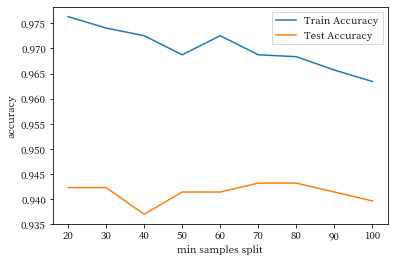

In [16]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()
#특정 값 지정 X

In [17]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf, max_depth = 4, n_estimators = 100, 
                                   learning_rate = 0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_accuracy
df_score_leaf["TestScore"] = test_accuracy
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.977,0.946
1,20,0.970,0.942
2,30,0.970,0.942
3,40,0.963,0.940
4,50,0.960,0.942
5,60,0.958,0.939
6,70,0.958,0.937
7,80,0.955,0.940
8,90,0.950,0.936
9,100,0.948,0.938


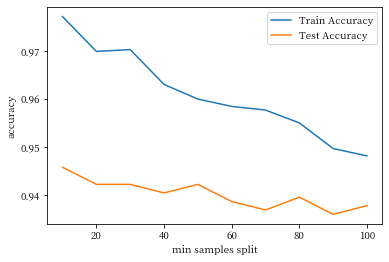

In [18]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()
#10 지정

In [19]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 10, max_depth = 4, n_estimators= 100, 
                                      learning_rate = 0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}\n".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.977

Accuracy on test set: 0.946

Confusion Matrix:
[[1018    3]
 [  58   46]]


In [20]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '설명변수')

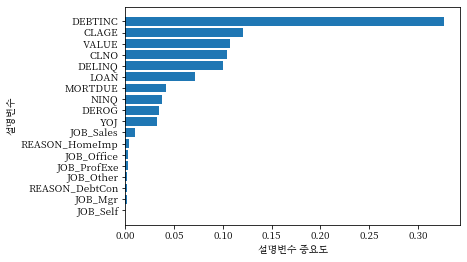

In [21]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [22]:
estimator = GradientBoostingClassifier(n_estimators=100,random_state=1234)
param_grid = {"learning_rate":para_lr,
              "max_depth": para_depth, 
              "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

best parameter: 
{'learning_rate': 0.4, 'max_depth': 8, 'min_samples_leaf': 10}

best score: 
0.956


# 서포트 벡터 머신

In [40]:
df_raw = pd.read_csv("/home/pirl/Downloads/HMEQ.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [41]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [42]:
#fillna:결측치 대체 함수
#JOB 변수의 결측치는 'Other'로 대체, inplace:fillna 함수 적용 후 df_raw데이터에 저장, FALSE면 저장 안함
df_raw['JOB'].fillna('Other',inplace=True)
#숫자형 변수의 결측치는 해당 변수의 평균값 입력:df_raw.mean()각 변수별 평균 계산 후 결측치 대체
df_raw.fillna(df_raw.mean(),inplace=True)

In [43]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [44]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["BAD"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)

(2623, 18)
(2623,)


In [45]:
#train_test_split(데이터,test_size=test 데이터 비율, random_state:랜덤)
df_train,df_test=train_test_split(df_raw,test_size=0.3,random_state=1234)#데이터,test데이터 비율
print("train data size:{}".format(df_train.shape))
print("test data size:{}".format(df_test.shape))


svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
#Test 데이터 정확도
print('Accuracy on test set:{:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

train data size:(2623, 13)
test data size:(1125, 13)
Accuracy on training set:0.908
Accuracy on test set:0.908


In [46]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

### C: 규제에 대한 강도 변경

In [47]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
#c:규제(0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['TestAccuracy']=test_accuracy

In [48]:
#C별 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908


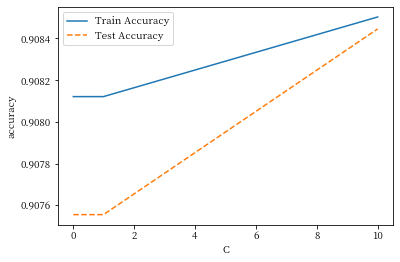

In [49]:
#모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()
#C가 1이상이면 train 데이터 이용한 모델의 정확도는 1(과대적합)test 정확도는 변화없음

### Gamma:훈련 샘플이 미치는 영향의 범위를 변경

In [51]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
#gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

In [52]:
#Gamma별 정확도 확인
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9081,0.9076
1,0.10,0.9081,0.9076
2,1.00,0.9081,0.9076
3,10.00,0.9081,0.9076


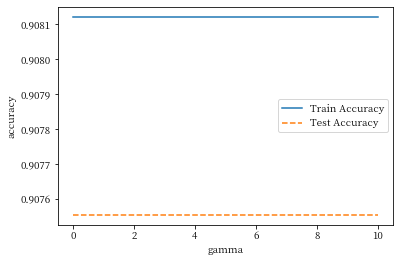

In [53]:
#모델 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()
#gamma변화는 정확도에 영향을 미치지 않음

### Standardscaler:설명변수 값의 구간을 동일하게 변경

In [54]:
#변수명 저장
v_feature_name=df_train_x.columns
#StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [55]:
#데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)


### scale이 조정된 데이터로 새로운 모델 생성

In [56]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
#test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.944
Accuracy on test set:0.935


### C:규제에 대한 강도 변경

In [63]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
#c:규제(0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

#데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['TestAccuracy']=test_accuracy

In [64]:
#C별 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


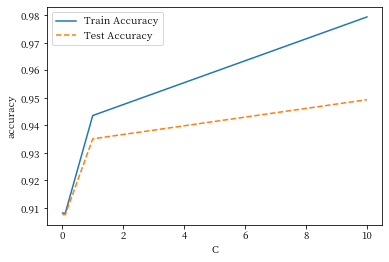

In [66]:
#모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()
#C=1 임의로 지정

### Gamma:훈련 샘플이 미치는 영향의 범위를 변경

In [67]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
#gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

In [68]:
#Gamma별 정확도 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


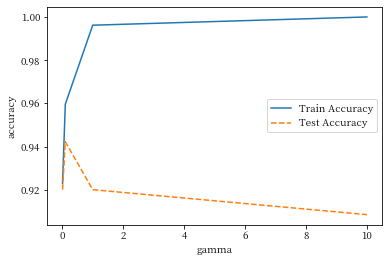

In [69]:
#Gamma별 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()
#gamma=0.1 임의로 지정

In [71]:
#최종 모델
svc_final=SVC(gamma=0.1,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
#평가
y_pred=svc_final.predict(df_scaled_test_x)
#Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
#Test 데이터 정확도
print('Accuracy on test set:{:.3f}'.format(svc_final.score(df_scaled_test_x,df_test_y)))
#confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.960
Accuracy on test set:0.942
Confusion matrix:
[[1021    0]
 [  65   39]]


In [72]:
#GridSearchCV를 이용한 최적 parameter 찾기
estimator=SVC(random_state=1234)
#구하고자 하는 parameter와 범위
param_grid={'C':para_c,'gamma':para_gamma}
#정확도가 높은 최적 parameter 찾기
grid_svc=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_svc.fit(df_scaled_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 10, 'gamma': 0.1}

best score:
0.96


# KNN

In [74]:
df = pd.read_csv("/home/pirl/Downloads/HMEQ.csv",engine = 'python', encoding = 'EUC-KR') #데이터 불러오기
#결측치 확인
df.isnull().sum(axis=0)


#fillna -> 결측치 대체
#JOB 변수 결측치 OTHER로 대체
df["JOB"].fillna("Other",inplace = True) #JOB의 결측치를 OTHER로 대체

#연속형 변수 결측치 -> 평균으로 대체
df.fillna(df.mean(), inplace = True)

In [75]:
#더미 변수 생성
df_dummy = pd.get_dummies(df)

df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [76]:

df_y=df_dummy['BAD']
df_x=df_dummy.drop('BAD',axis=1,inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))


train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data X size : (1125,)


In [79]:
#KNN 모델 생성(default 설정)
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)

#train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))

#test 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

#성능은 유사하나 다소 과소적합

Accuracy on training set : 0.916
Accuracy on test set : 0.908


In [81]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 모델 생성 -이웃 수 증가에 따른 정확도 변화

In [82]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["Train Accuracy"] = train_accuracy
df_accuracy_neighbors["Test Accuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,Train Accuracy,Test Accuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


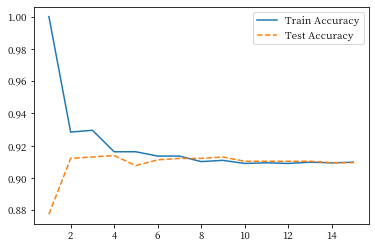

In [83]:
#모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [84]:
#임의로 이웃 수 지정
n_neighbors = 4

### 모델 생성 - 가중치별 이웃 수 증가에 따른 정확도 변화

In [85]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#이웃 수: 1~15
para_n_neighbors = [i for i in range(1,11)]*2

#가중치(uniform, distance)
para_weights = (["uniform"])*10 + (["distance"]*10)

#zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors,v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["Train Accuracy"] = train_accuracy
df_accuracy_weights["Test Accuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,Train Accuracy,Test Accuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [86]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors",columns = "Weights",
                                                      values = ["Train Accuracy","Test Accuracy"])

df_accuracy_weights_pivot

Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.877333  0.877333
2                    1.0  0.928326      0.877333  0.912000
3                    1.0  0.929470      0.912000  0.912889
4                    1.0  0.916127      0.913778  0.913778
5                    1.0  0.916127      0.912889  0.907556
6                    1.0  0.913458      0.912889  0.911111
7                    1.0  0.913458      0.912889  0.912000
8                    1.0  0.910027      0.913778  0.912000
9                    1.0  0.910789      0.914667  0.912889
10                   1.0  0.908883      0.914667  0.910222

In [87]:
#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,Train Accuracy_distance,Train Accuracy_uniform,Test Accuracy_distance,Test Accuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


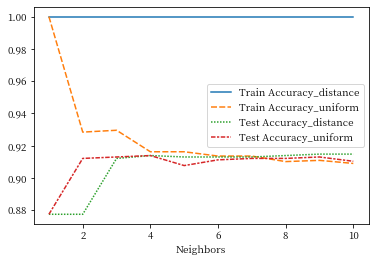

In [89]:
#그래프 생성, 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)
#가중치 distance일 떄 모델의 정확도는 1 (과대적합)

In [90]:
#임의로 가중치 지정
weights = "uniform"

### 모델 생성 - 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [91]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#이웃 수
para_n_neighbors = [i for i in range(1,11)]*3

#거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric,weights = "uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["Train Accuracy"] = train_accuracy
df_accuracy_metric["Test Accuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,Train Accuracy,Test Accuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


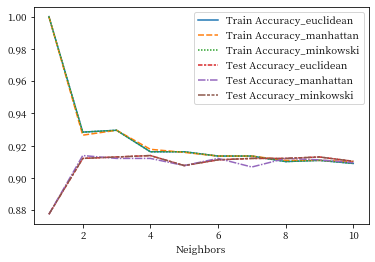

In [92]:
#정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors",columns = "Metric",
                                                      values = ["Train Accuracy","Test Accuracy"])


level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

### 결론 도출

In [93]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors=4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x,df_train_y)

# 평가
y_pred = knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:",knn_model.score(df_train_x,df_train_y))

#test 데이터 셋 정확도
print("test data accuracy:",knn_model.score(df_test_x,df_test_y))

#confusion matrix
print("Confusion matrix:\n",confusion_matrix(df_test_y,y_pred))

train data accuracy: 0.9161265726267632
test data accuracy: 0.9137777777777778
Confusion matrix:
 [[1018    3]
 [  94   10]]
